In [ ]:
#_________________ Applied Statistics 2024/2025 _________________________________

#### 6.1.GEOSTATISTICS ####
#__________________________#

In [15]:

## Clear the workspace
rm(list=ls())

install.packages('sp')
install.packages('gstat')
install.packages('geoR')

## Load spatial packages

library(sp)           ## Data management
library(lattice)      ## Data management
library(gstat)        ## Geostatistics (essential package)
library(geoR)         ## Geostatistics (just for some plots)
#                        (for people with Mac: you need to have XQuartz https://www.xquartz.org/)


The downloaded binary packages are in
	/var/folders/2n/xc_5x6ys00q7kj5lcfn2s10r0000gn/T//RtmpXe8g5H/downloaded_packages


also installing the dependencies 'xts', 'intervals', 'zoo', 'sftime', 'spacetime', 'stars', 'FNN'





The downloaded binary packages are in
	/var/folders/2n/xc_5x6ys00q7kj5lcfn2s10r0000gn/T//RtmpXe8g5H/downloaded_packages


also installing the dependency 'splancs'





The downloaded binary packages are in
	/var/folders/2n/xc_5x6ys00q7kj5lcfn2s10r0000gn/T//RtmpXe8g5H/downloaded_packages


--------------------------------------------------------------
 Analysis of Geostatistical Data
 For an Introduction to geoR go to http://www.leg.ufpr.br/geoR
 geoR version 1.9-4 (built on 2024-02-14) is now loaded
--------------------------------------------------------------




In [16]:

## Set working directory 

## Functions for graphics 
v.f <- function(x, ...){100-cov.spatial(x, ...)}
v.f.est<-function(x,C0, ...){C0-cov.spatial(x, ...)}

In [17]:
####   EXPLORATORY ANALYSIS & VARIOGRAM ESTIMATION  ####

## Load meuse data set:
## The meuse is a classical geostatistical data set used frequently
## to demonstrate various geostatistical analysis steps.
## The point data set consists of 155 samples of top soil heavy metal
## concentrations (ppm), along with a number of soil and landscape variables.
## The samples were collected in a flood plain of the river Meuse,
## near the village Stein (The Netherlands).

data(meuse) # available in gstat
?meuse

meuse                    package:sp                    R Documentation

_M_e_u_s_e _r_i_v_e_r _d_a_t_a _s_e_t

_D_e_s_c_r_i_p_t_i_o_n:

     This data set gives locations and topsoil heavy metal
     concentrations, along with a number of soil and landscape
     variables at the observation locations, collected in a flood plain
     of the river Meuse, near the village of Stein (NL). Heavy metal
     concentrations are from composite samples of an area of
     approximately 15 m x 15 m.

_U_s_a_g_e:

     data(meuse)
     
_F_o_r_m_a_t:

     This data frame contains the following columns:

     x a numeric vector; Easting (m) in Rijksdriehoek (RDH)
          (Netherlands topographical) map coordinates

     y a numeric vector; Northing (m) in RDH coordinates

     cadmium topsoil cadmium concentration, mg kg-1 soil ("ppm"); zero
          cadmium values in the original data set have been shifted to
          0.2 (half the lowest non-zero value)



In [18]:

# before starting working, be sure you have transformed latitude & longitude
# in UTM coordinates (planar coordinates, in meters)

## Define the sample coordinates
coordinates(meuse) <- c('x','y')
meuse # meuse is now a spatial dataframe 

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

         coordinates cadmium copper lead zinc   elev       dist   om ffreq soil
1   (181072, 333611)    11.7     85  299 1022  7.909 0.00135803 13.6     1    1
2   (181025, 333558)     8.6     81  277 1141  6.983 0.01222430 14.0     1    1
3   (181165, 333537)     6.5     68  199  640  7.800 0.10302900 13.0     1    1
4   (181298, 333484)     2.6     81  116  257  7.655 0.19009400  8.0     1    2
5   (181307, 333330)     2.8     48  117  269  7.480 0.27709000  8.7     1    2
6   (181390, 333260)     3.0     61  137  281  7.791 0.36406700  7.8     1    2
7   (181165, 333370)     3.2     31  132  346  8.217 0.19009400  9.2     1    2
8   (181027, 333363)     2.8     29  150  406  8.490 0.09215160  9.5     1    1
9   (181060, 333231)     2.4     37  133  347  8.668 0.18461400 10.6     1    1
10  (181232, 333168)     1.6     24   80  183  9.049 0.30970200  6.3     1    2
11  (181191, 333115)     1.4     25   86  189  9.015 0.31511600  6.4     1    2
12  (181032, 333031)     1.8     25   97

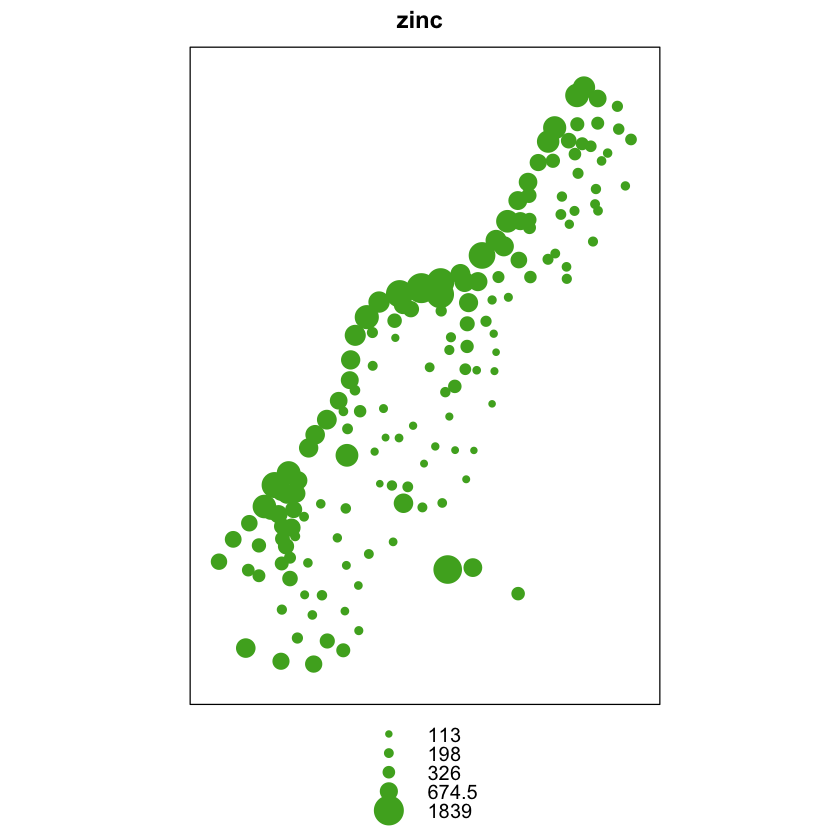

null device 
          1

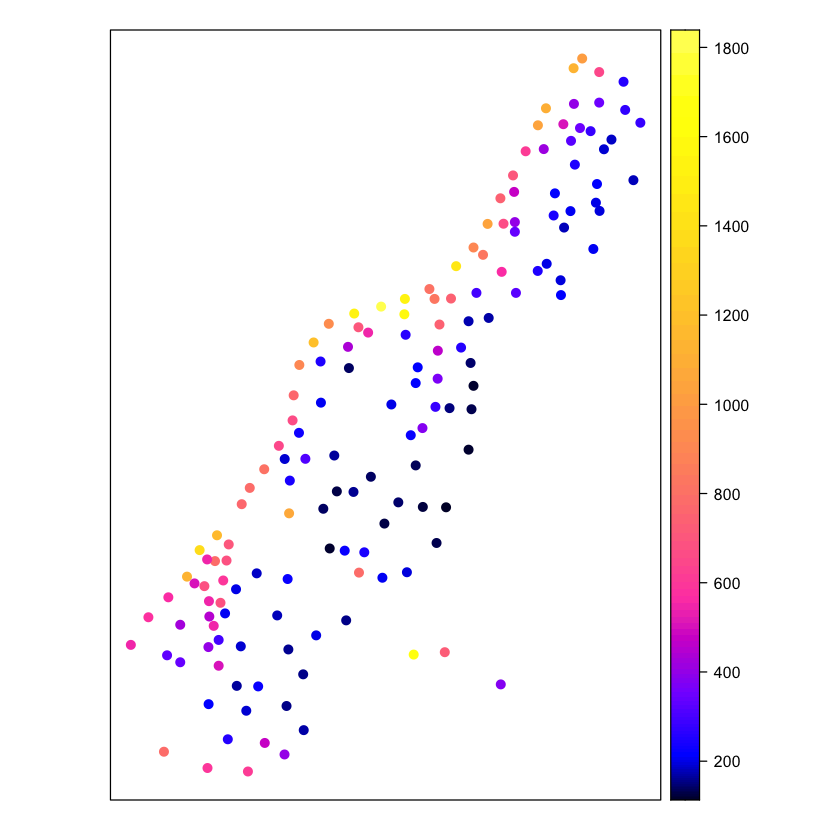

In [19]:
# bubble plot(obj,zcol,...)
# key.space=location of the key
bubble(meuse, 'zinc', do.log=TRUE, key.space='bottom')
# dimension of of the bubbles is proportional to the value of variable 'zinc'
# --> we notice that the higher values of zinc are close to river

spplot(meuse, "zinc", do.log = T, colorkey = TRUE)

dev.off()

[1] "data.frame" "list"       "oldClass"   "vector"     "listOrNULL"

null device 
          1

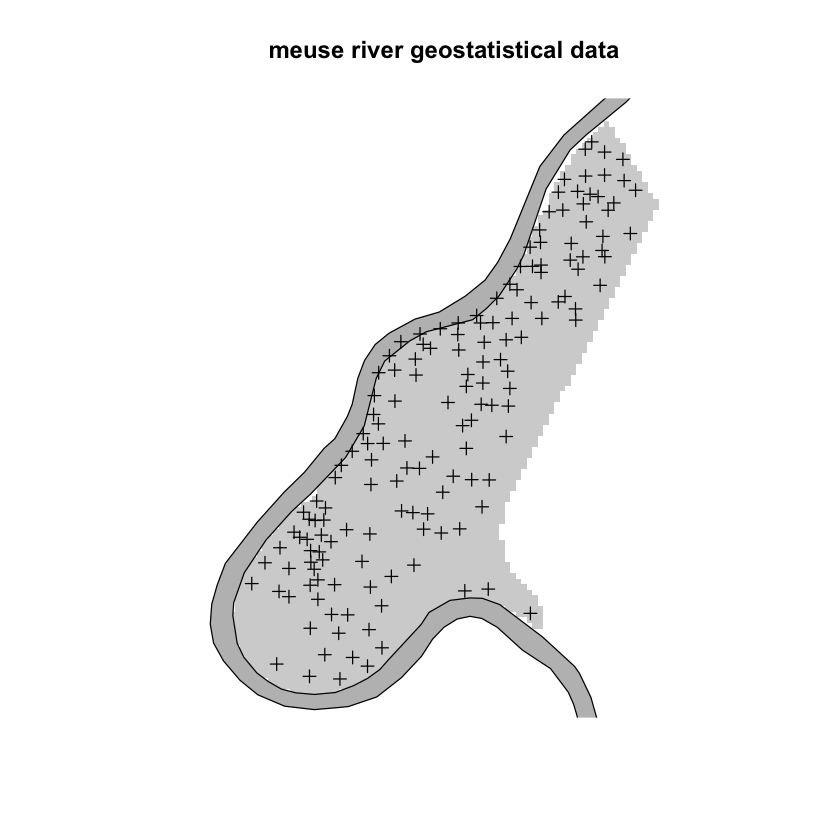

In [20]:
# just for a better visualization of the river Meuse:
# we load river meuse data
data(meuse.riv)
meuse.lst <- list(Polygons(list(Polygon(meuse.riv)), "meuse.riv"))
meuse.sr <- SpatialPolygons(meuse.lst)
# grid for prediction
data(meuse.grid)
is(meuse.grid)
coordinates(meuse.grid) <- c('x','y')
meuse.grid <- as(meuse.grid, 'SpatialPixelsDataFrame')
# plot all together
image(meuse.grid, col = "lightgrey")
plot(meuse.sr, col = "grey", add = TRUE)
plot(meuse, add = TRUE)
title('meuse river geostatistical data')
# sampling locations are crosses
# we visualize the river
# domain D is grey area (subset of R^2 because we used UTM coordinates)

dev.off()

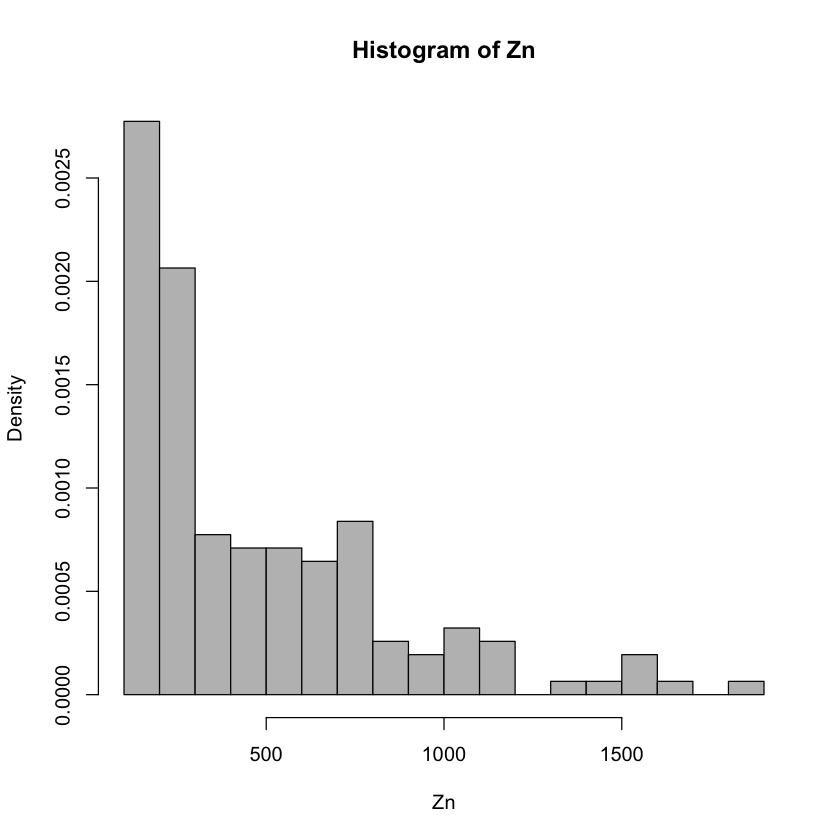

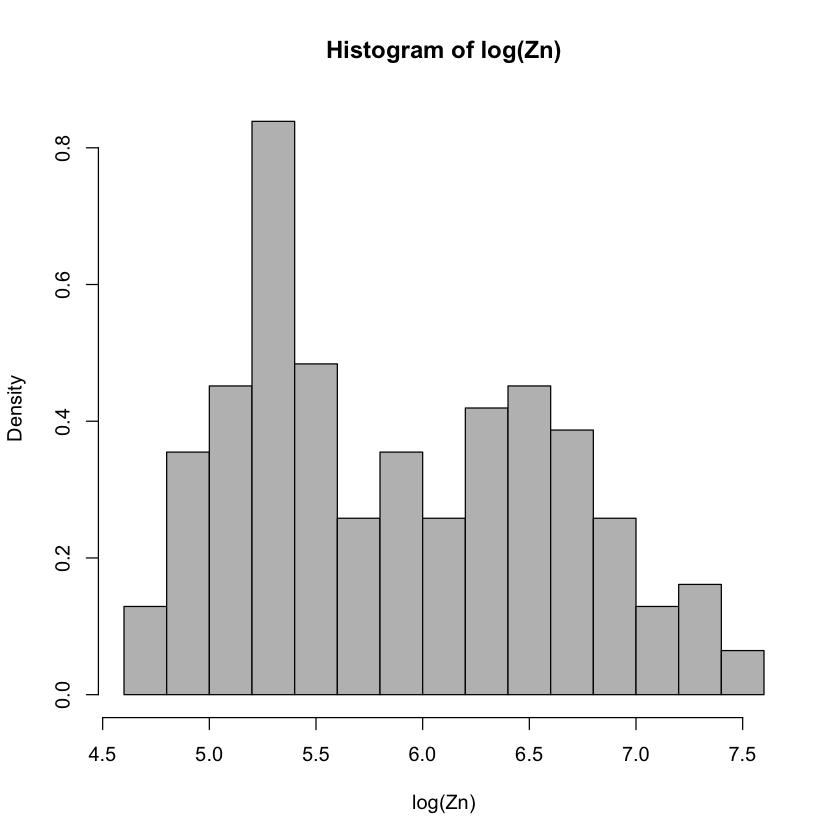

In [23]:
##### Exploratory Analysis #####
# we select a variable, e.g. zinc
# [as homework, you could replicate the analysis with other variables]
par(bg = 'white')
# histogram of zinc variable 
hist(meuse$zinc, breaks=16, col="grey", main='Histogram of Zn', prob = TRUE, xlab = 'Zn')
# highly skewed, transform to the log
hist(log(meuse$zinc), breaks=16, col="grey", main='Histogram of log(Zn)', prob = TRUE, xlab = 'log(Zn)')


null device 
          1

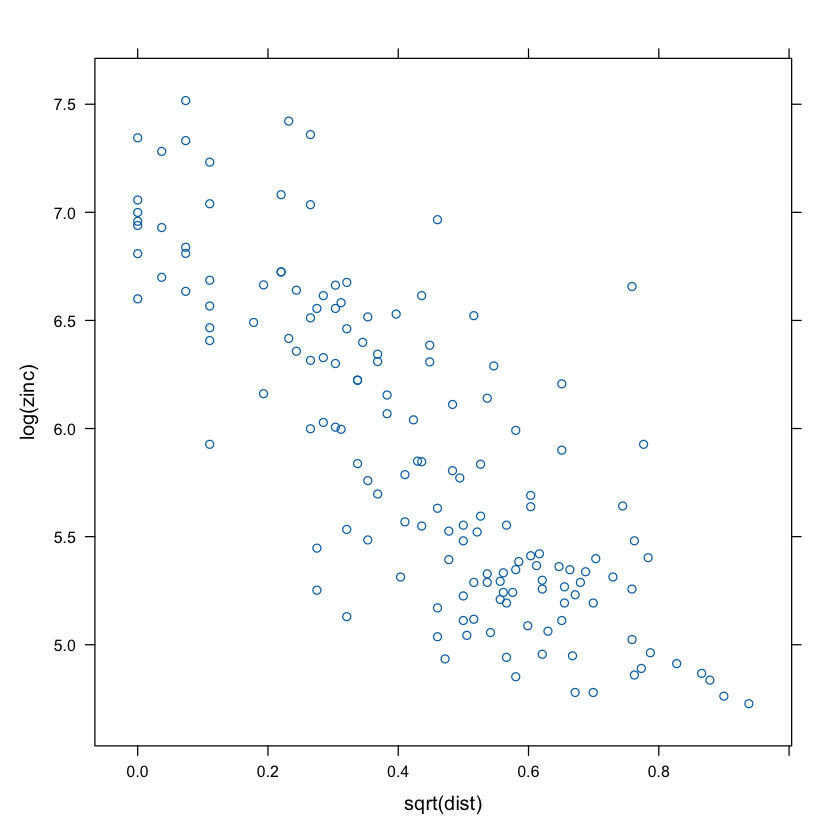

In [24]:
# scatterplot of log(zinc) with respect to distance from the river 
xyplot(log(zinc) ~ sqrt(dist), as.data.frame(meuse))
# Negative Correlation: lower distance from the river => higher level of zinc
# it supports what we observed in the bubble plot
dev.off()

In [25]:
##### Estimating Spatial Correlation #####
#           Variogram Analysis     #

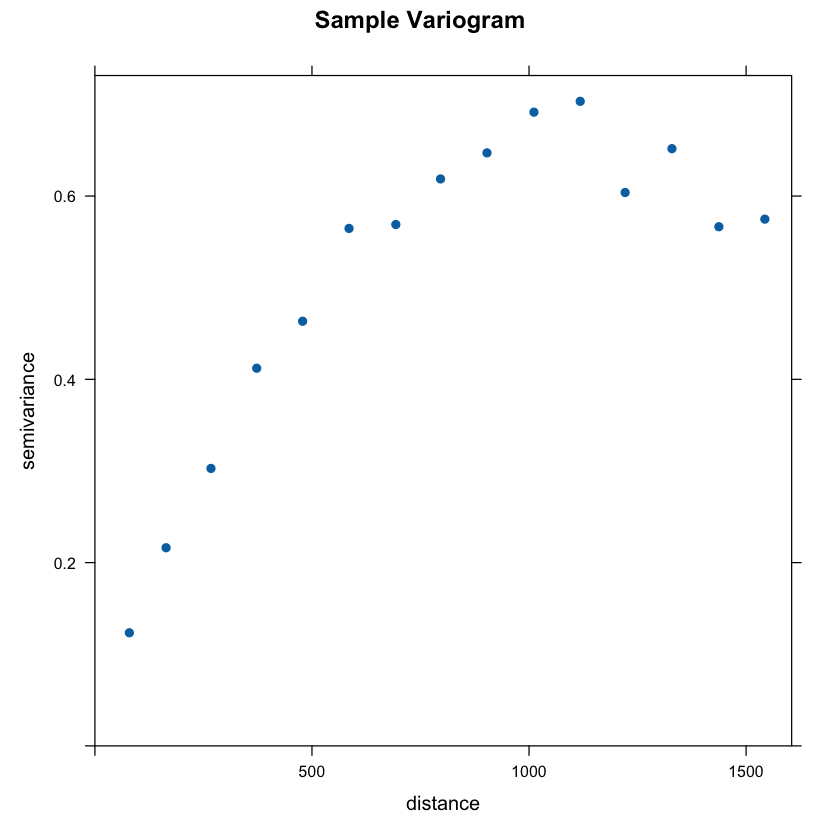

In [26]:
# sample (empirical) variogram (binned estimator)
# the function variogram, which takes a formula as its first argument: 
#.      the notation "~ 1" stands for a single constant predictor
#.      (hp: spatially constant mean - stationary model)
# log(zinc)~1 means that we assume a constant trend for the variable log(zinc).

svgm <- variogram(log(zinc) ~ 1, meuse) # with all the defaults of the function

plot(svgm, main = 'Sample Variogram', pch=19)
# Observations:
# 1) is there an asymptote? if yes, it is compatible with stationarity;
# 2) behaviour near zero? Linear model could fit well; also a quadratic might work.

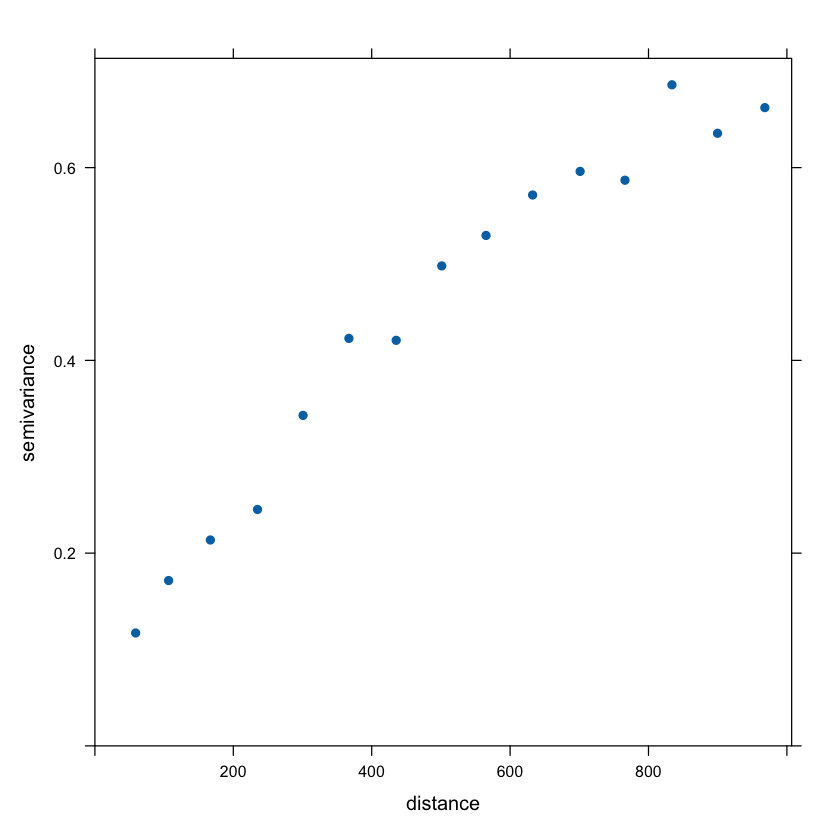

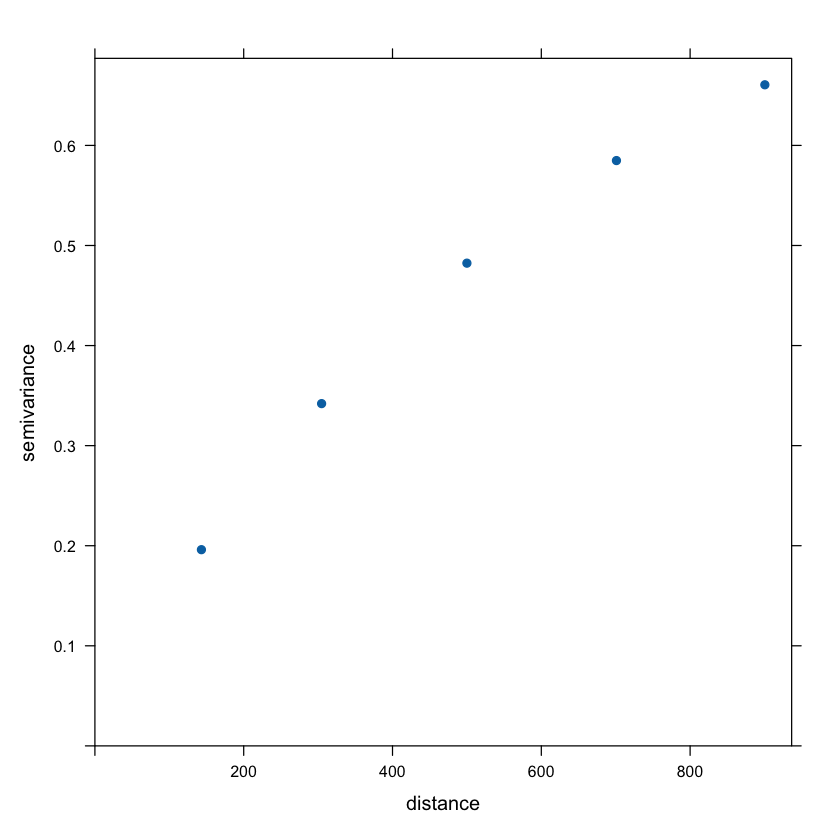

In [28]:
# 15 lags by default
# default decisions:
# cutoff, lag width, direction dependence

# cutoff distance: maximum distance up to which point pairs are considered
#                  (default: bbox diagonal / 3) [empirical rule]
#                  where bbox stands for bounding box
# NB: cutoff distance should be much shorter than the maximum distance among points

# lag width: width of distance intervals over which point pairs are averaged
#            in bins (default: cutoff distance / 15)

plot(variogram(log(zinc) ~ 1, meuse, cutoff = 1000, width = 1000/15),pch=19)  # smaller cutoff
plot(variogram(log(zinc) ~ 1, meuse, cutoff = 1000, width = 1000/5),pch=19)  # larger width

[1]    0  200  400  500  600  700  800  900 1000 1100 1200 1300 1400 1500

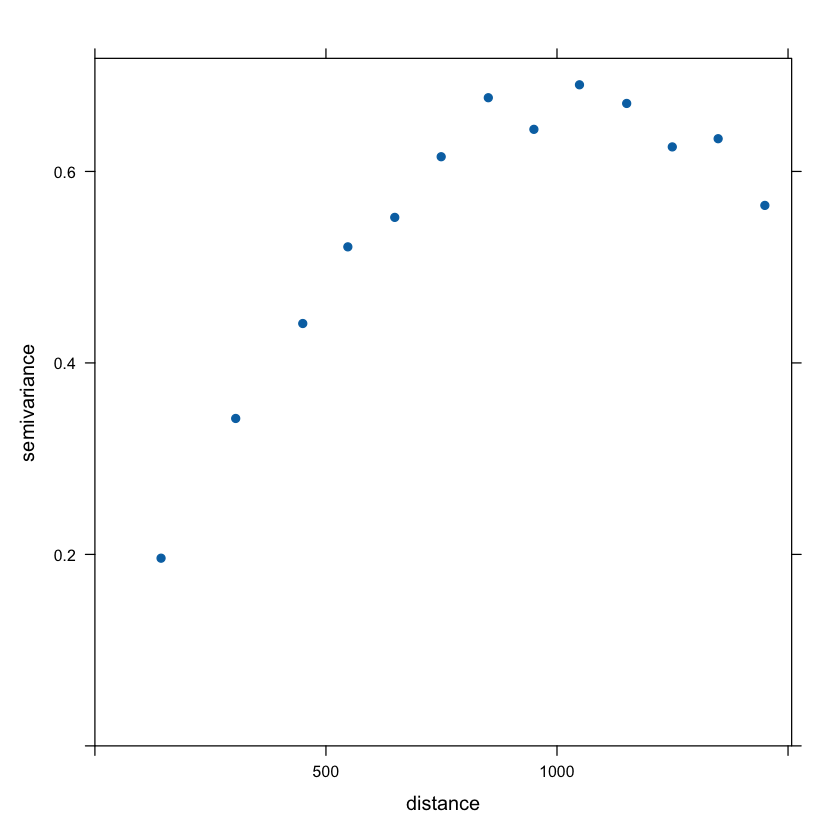

In [30]:
# intervals can have different widths: to fix varying widths use the argument boundaries
c(0,200, seq(400,1500,100))
plot(variogram(log(zinc) ~ 1, meuse, boundaries = c(0,200, seq(400,1500,100))),pch=19)
# change it depending on the disposition of your data in space

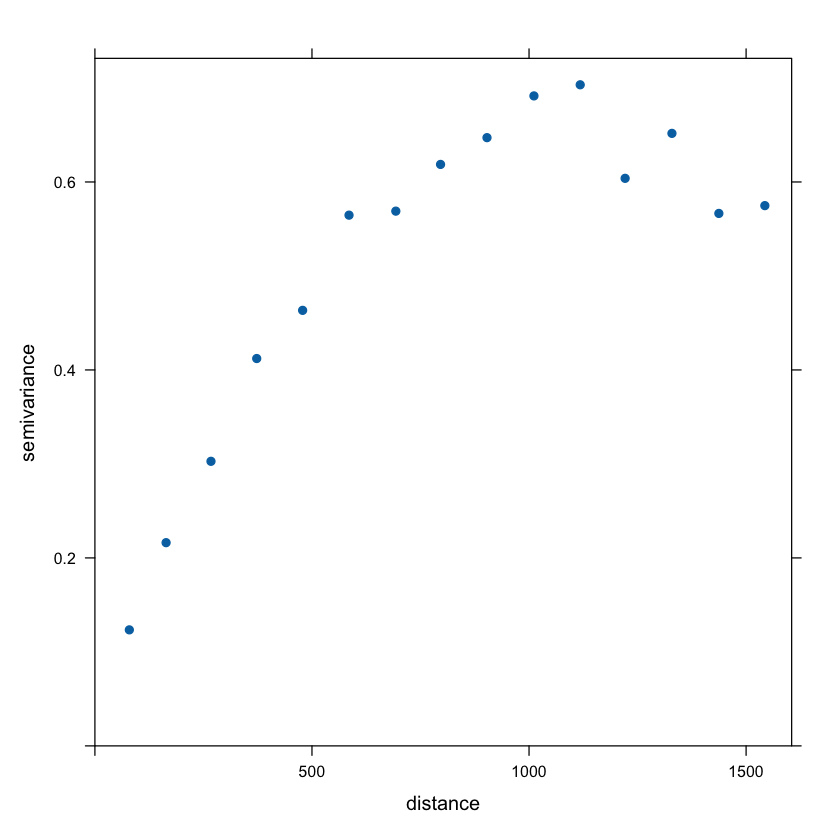

In [31]:
# the following
plot(variogram(log(zinc) ~ 1, meuse), pch=19)
# automatically decides to ignore direction: point pairs are merged on the
# basis of distance to compute the empirical variogram

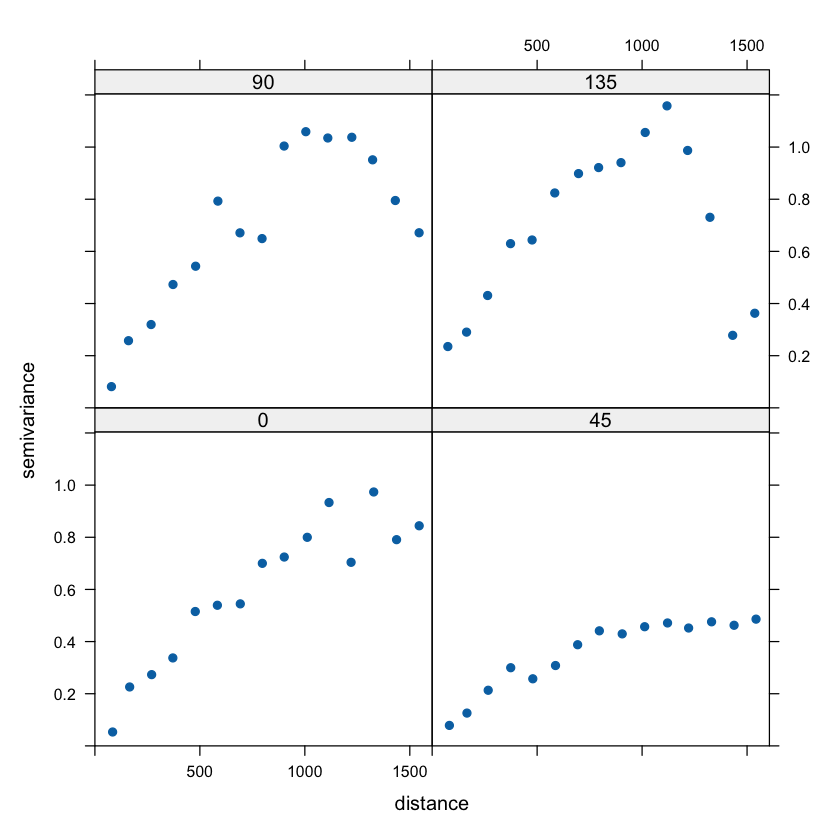

In [32]:
# we can take into account different directions through 'alpha':
plot(variogram(log(zinc) ~ 1, meuse, alpha = c(0, 45, 90, 135)), pch=19)
# point pairs whose separation vector has a given direction 
# are used in each panel (not too many directions otherwise noise will increase)
# Note: Zonal Anisotropy 
# look at direction 45 --> difference in the asymptote --> sill --> less variability
# it is the direction parallel to the river --> we should include the river in the model

# for the moment we proceed assuming isotropy, 
# but, in general, the options we have are the following:
# --> model anisotropy (anisotropic variogram model; it can be done by the package)
# --> correct anisotropy by including a non-stationarity,
#     accounting for anisotropy in a covariate

In [33]:
##### Variogram modeling #####

# we go on assuming isotropicity

In [35]:

# list of parametric isotropic variogram models
vgm()

short,long
<fct>,<fct>
Nug,Nug (nugget)
Exp,Exp (exponential)
Sph,Sph (spherical)
Gau,Gau (gaussian)
Exc,Exclass (Exponential class/stable)
Mat,Mat (Matern)
Ste,"Mat (Matern, M. Stein's parameterization)"
Cir,Cir (circular)
Lin,Lin (linear)


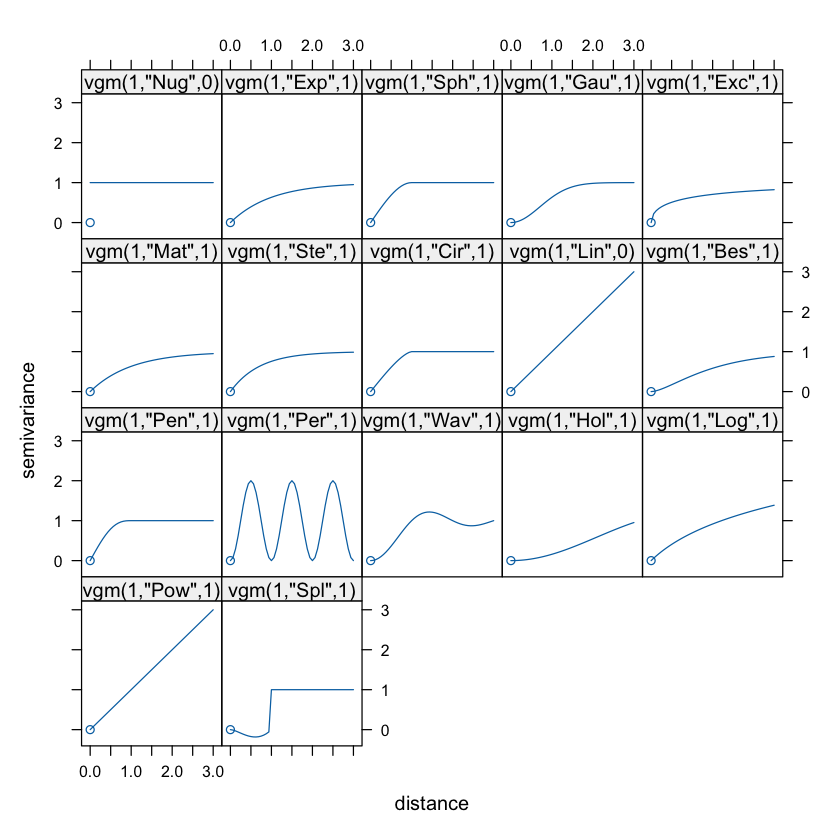

In [36]:

# basic variograms available
show.vgms() 

In [ ]:
# chose the basic model for variogram fitting


# in gstat, valid variogram models are constructed by using one or
# combination of two or more basic variogram models
# first argument of the function 'vgm' is partial sill,
# then the desired model, then range, and finally nugget: 
# vgm(sill, model, range, nugget)

# some examples...
vgm(1, "Sph", 300)
vgm(1, "Sph", 300, 0.5)

model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sph,1,300,0.5,0,0,0,1,1


,model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Nug,0.5,0,0.0,0,0,0,1,1
2,Sph,1.0,300,0.5,0,0,0,1,1


In [41]:
# one can also add two or more models
v1 <- vgm(1, "Sph", 300, 0.5)
v2 <- vgm(0.8, "Sph", 800, add.to = v1) # by specifying "add.to = .. " 
v2

,model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Nug,0.5,0,0.0,0,0,0,1,1
2,Sph,1.0,300,0.5,0,0,0,1,1
3,Sph,0.8,800,0.5,0,0,0,1,1


In [42]:
# this is only measurement error
vgm(0.5, "Nug", 0)

model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nug,0.5,0,0.5,0,0,0,1,1


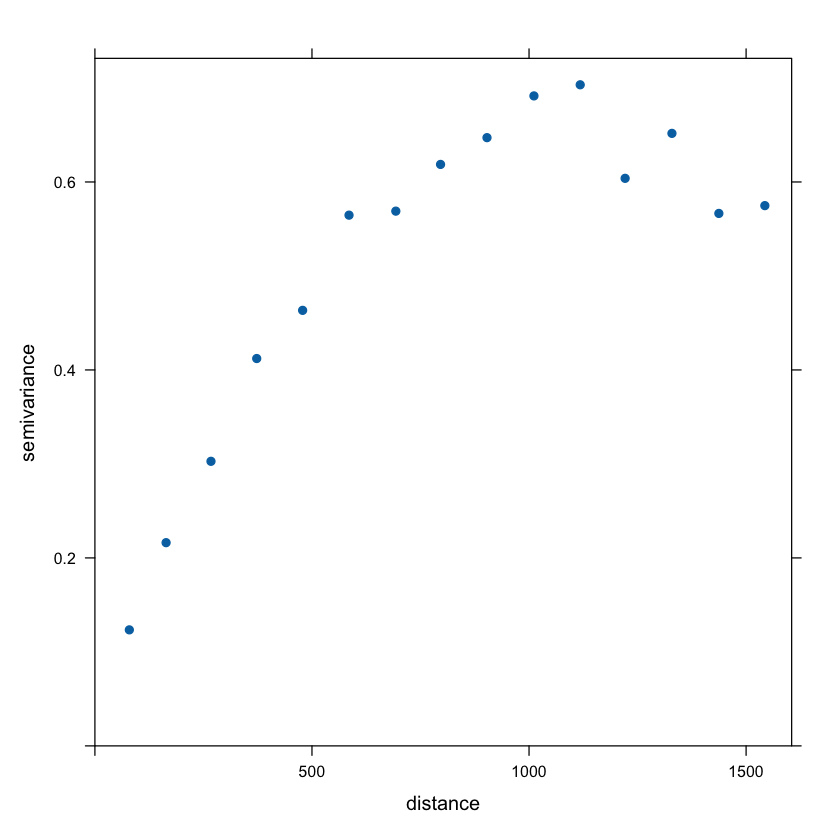

In [43]:
## weighted least squares fitting a variogram model to the sample variogram

## STEPS:
## 1) choose a suitable model
## 2) choose suitable initial values for partial sill, range & nugget
## 3) fit the model using one of the possible fitting criteria

v <- variogram(log(zinc) ~ 1, meuse)
plot(v,pch=19)

In [44]:
# Linear behavior near the origin, growth not very fast 
# Recall: both spherical and exponential model have a Linear behavior near the
#         origin but Exponential Model has a Faster Growth than the Spherical One
# => we fit a spherical model

# try reasonable initial values (remember: vgm(sill, model, range, nugget))
fit.variogram(v, vgm(0.65, "Sph", 800, 0.1))
fit.variogram(v, vgm(1, "Sph", 800, 1)) # --> sill and nugget are largely overestimated;
                                        # the most difficult parameter to fit is the range


,model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Nug,0.05065537,0.0000,0.0,0,0,0,1,1
2,Sph,0.59060075,896.9692,0.5,0,0,0,1,1


,model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Nug,0.05065923,0.0000,0.0,0,0,0,1,1
2,Sph,0.59060463,896.9976,0.5,0,0,0,1,1


In [45]:
# try unreasonable initial values
fit.variogram(v, vgm(1, "Sph", 10, 1))
# due to high non-linearity in the minimization problem,
# starting from unreasonable initial values might cause fail to converge

Warning message in fit.variogram(v, vgm(1, "Sph", 10, 1)):
"singular model in variogram fit"


,model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Nug,1,0,0.0,0,0,0,1,1
2,Sph,1,10,0.5,0,0,0,1,1


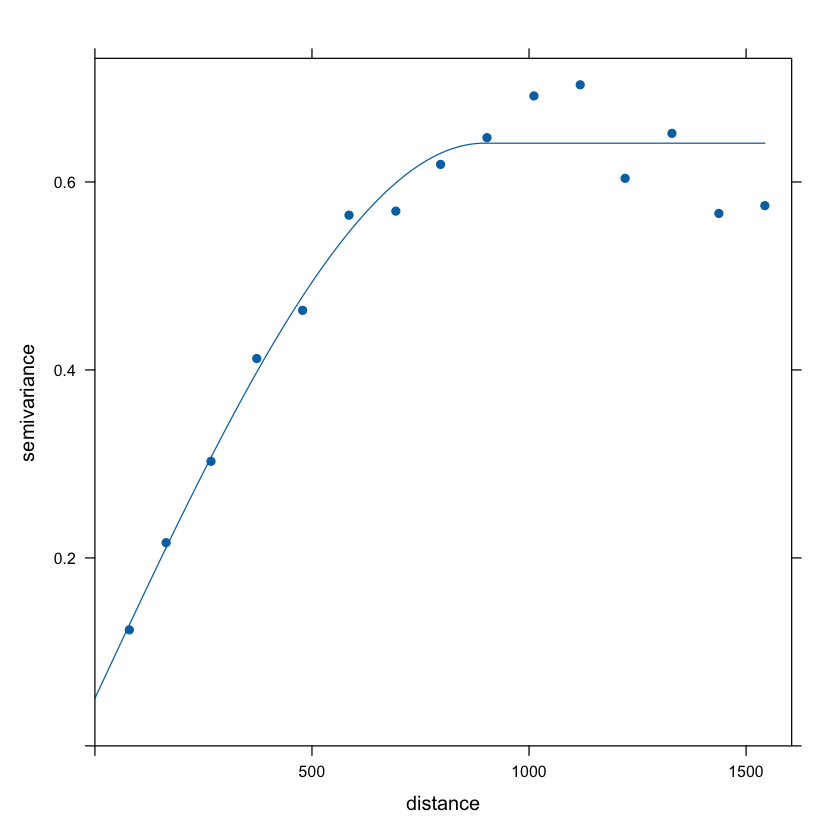

In [47]:
# plot of the final fit
v <- variogram(log(zinc) ~ 1, meuse)
v.fit <- fit.variogram(v, vgm(1, "Sph", 800, 1))
plot(v, v.fit, pch = 19) # always do this!

In [48]:
# fitting method: non linear regression with minimization of weighted
# sum of squares error. Final value of the minimum
attr(v.fit, 'SSErr')
# how can we choose weights? argument fit.method in fit.variogram:
# fit.method = 1 : w = N_j
# fit.method = 2 : w = N_j/gamma(h_j)^2
# fit.method = 6 : w = 1
# fit.method = 7 : w = N_j/h_j^2 (default method)

# one can also keep one of the parameters fixed, and fit only the others.
# This is common for the nugget parameter, which may be hard to infer from data
# when sample locations are regularly spread. Information may be derived from
# measurement error characteristics for a specific device.

# ex: fix the nugget variance to the value 0.06
fit.variogram(v, vgm(1, "Sph", 800, 0.06), fit.sills = c(FALSE, TRUE))
# the range parameters can be fixed using argument fit.ranges

[1] 9.011194e-06

,model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Nug,0.0600000,0.0000,0.0,0,0,0,1,1
2,Sph,0.5845836,923.0066,0.5,0,0,0,1,1


In [49]:

## maximum likelihood fitting of variogram models
## - does not need the sample variogram
## - can be performed through restricted maximum likelihood
fit.variogram.reml(log(zinc) ~ 1, meuse, model=vgm(0.6, "Sph", 800, 0.06))
# compare it with
v.fit

,model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Nug,0.02006905,0,0.0,0,0,0,1,1
2,Sph,0.57134920,800,0.5,0,0,0,1,1


,model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Nug,0.05065923,0.0000,0.0,0,0,0,1,1
2,Sph,0.59060463,896.9976,0.5,0,0,0,1,1


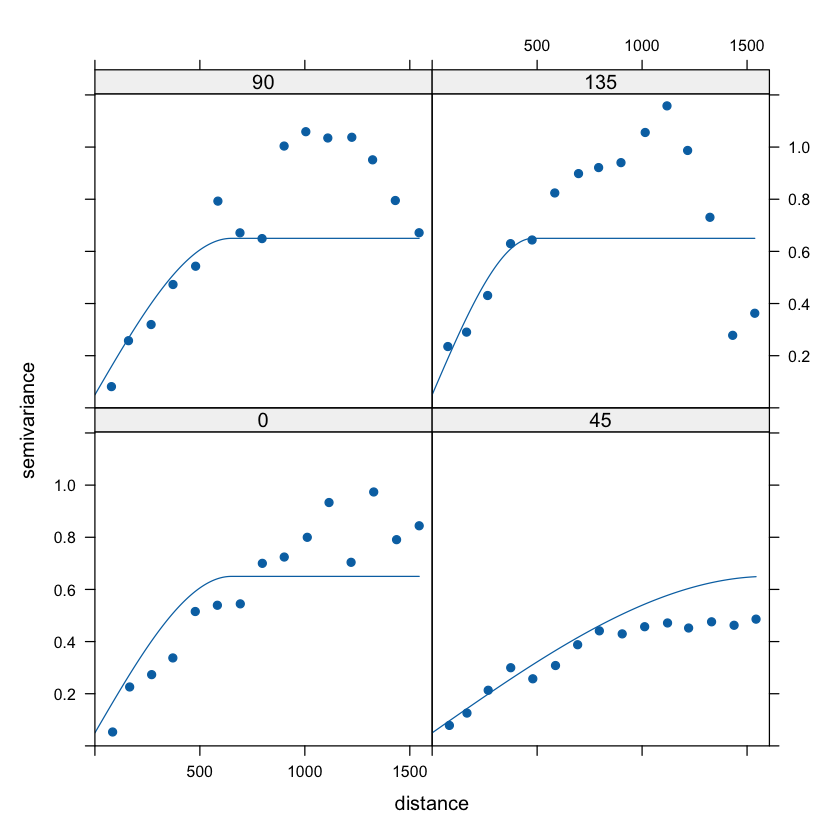

In [50]:
## modeling anisotropy*
v.dir <- variogram(log(zinc)~1, meuse, alpha=(0:3)*45) 
v.anis <- vgm(.6, "Sph", 1600, .05, anis=c(45, 0.3))

print(plot(v.dir, v.anis, pch=19))
# --> better to correct anisotropy by including a non-stationarity,
#     accounting for anisotropy in a covariate

In [ ]:
####          SPATIAL PREDICTION & KRIGING          ####

In [ ]:
##### Stationary Univariate Spatial Prediction (Ordinary Kriging) #####


In [51]:

## Prediction at a single new location 
s0.new = data.frame(x=179180, y=330100) # UTM coordinates 
coordinates(s0.new) = c('x','y')        # set the coordinates of the dataframe


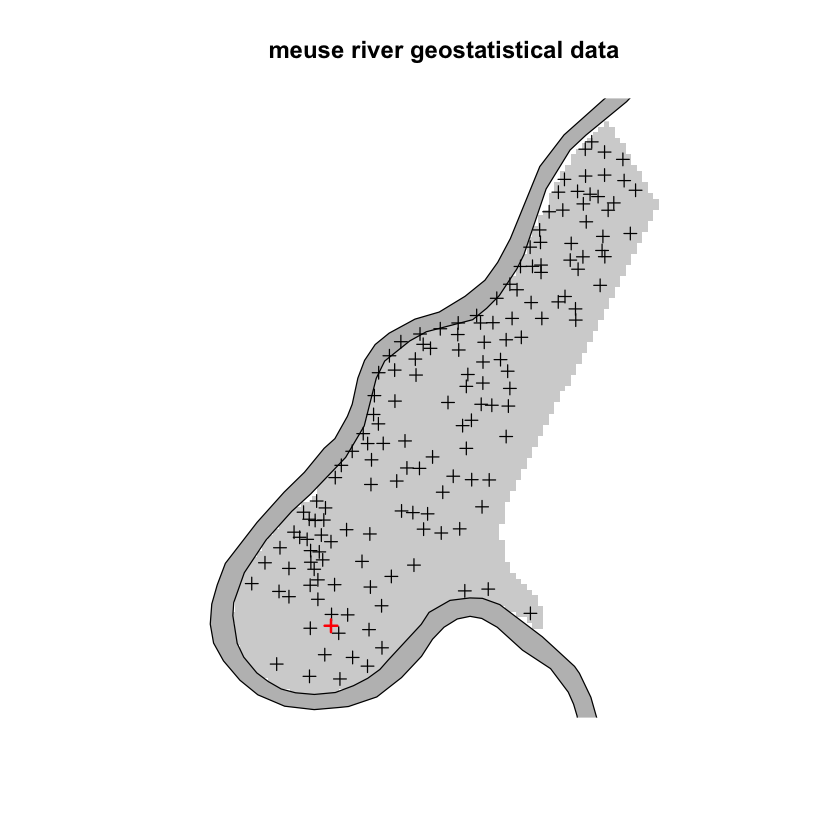

In [53]:
par(bg = 'white')
# plot all together
image(meuse.grid, col = "lightgrey")
plot(meuse.sr, col = "grey", add = TRUE)
plot(meuse, add = TRUE)
plot(s0.new, add = TRUE, col='red', lwd = 2)
title('meuse river geostatistical data')


In [54]:

# Create a gstat object setting a spherical (residual) variogram
# gstat(g.obj, id, formula, data, model, set,...)
g.tr <- gstat(formula = log(zinc) ~ 1, data = meuse, model = v.fit) # v.fit is the variogram model we use
g.tr

data:
var1 : formula = log(zinc)`~`1 ; data dim = 155 x 12
variograms:
        model      psill    range
var1[1]   Nug 0.05065923   0.0000
var1[2]   Sph 0.59060463 896.9976

In [55]:
## ordinary kriging
# Make the ordinary kriging prediction with the function: 
# predict(obj, grid, BLUE=FALSE)
# this gives the prediction of Y(s_0):
predict(g.tr, s0.new)
# var1.pred is the predicted log(zinc) 
# var1.var variance of prediction error (ordinary kriging variance)
# variance > 0 (as expected)

[using ordinary kriging]


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

       coordinates var1.pred  var1.var
1 (179180, 330100)  5.293158 0.1433444

In [57]:
# Estimate the mean: use the argument 'BLUE'
predict(g.tr, s0.new, BLUE = TRUE)
# this gives the estimate (best linear unbiased estimator) of the mean
# (trend component) under gls model

[generalized least squares trend estimation]


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

       coordinates var1.pred   var1.var
1 (179180, 330100)  6.053541 0.03981776

In [58]:
## consider a location where I OBSERVE data
# this gives the prediction of Y(s_0)
# in the first location (zero variance!)
meuse[1,]
log(1022)
predict(g.tr, meuse[1,]) 
# --> prediction is exactly that value
# --> zero prediction variance: I know that point

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

       coordinates cadmium copper lead zinc  elev       dist   om ffreq soil
1 (181072, 333611)    11.7     85  299 1022 7.909 0.00135803 13.6     1    1
  lime landuse dist.m
1    1      Ah     50

[1] 6.929517

[using ordinary kriging]


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

       coordinates var1.pred     var1.var
1 (181072, 333611)  6.929517 4.907917e-34

[generalized least squares trend estimation]


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

       coordinates var1.pred   var1.var
1 (181072, 333611)  6.053541 0.03981776

[using ordinary kriging]


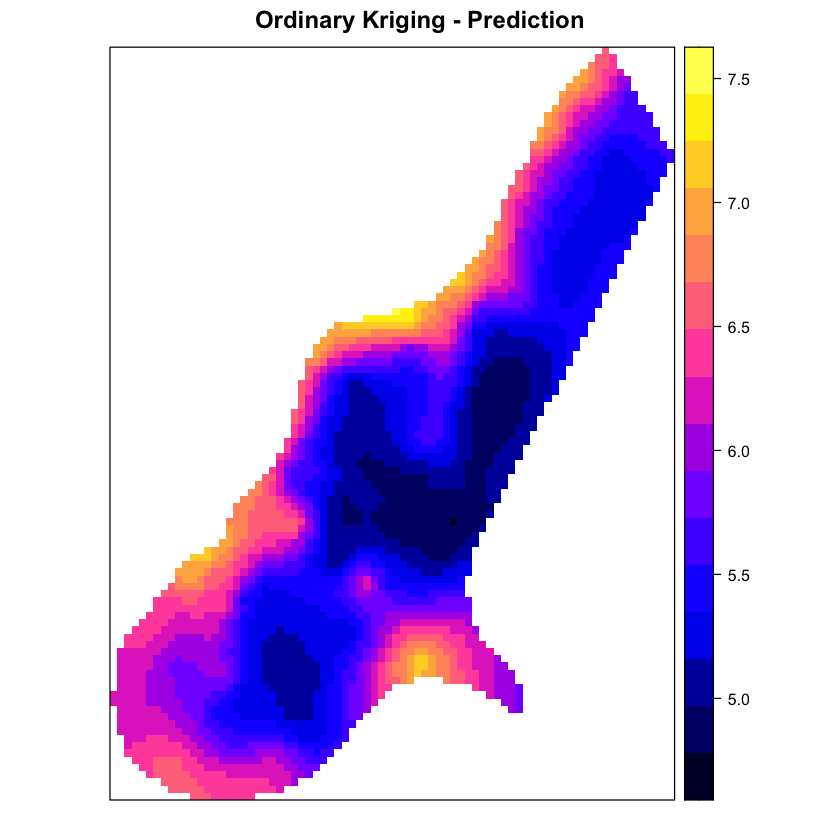

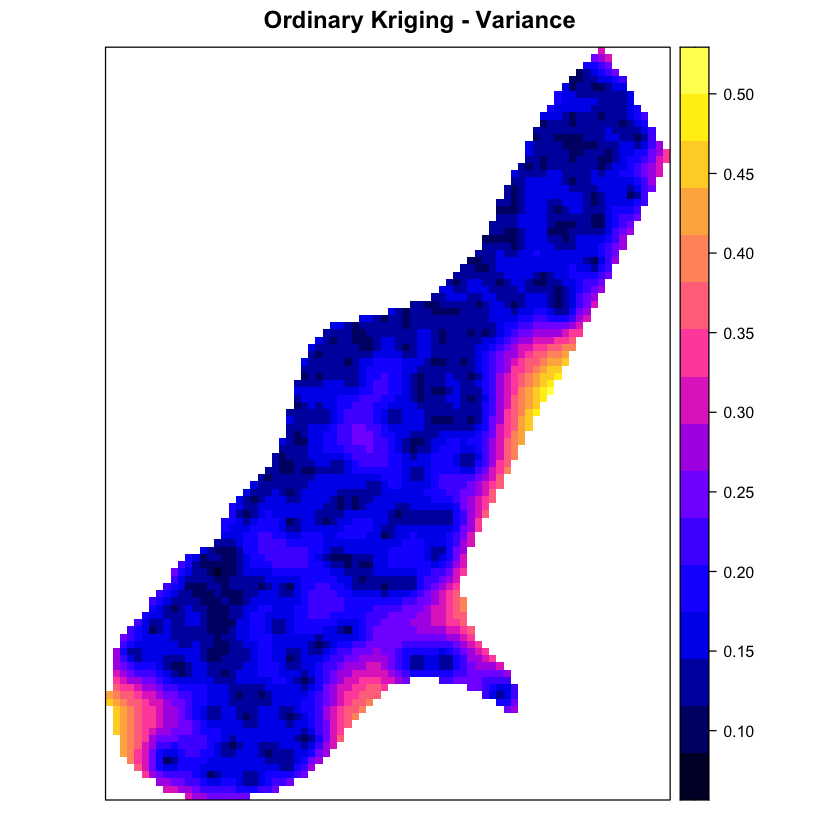

In [59]:
# this gives the estimate of the mean
# (drift component) under gls
predict(g.tr, meuse[1,], BLUE = TRUE) # same mean everywhere (I am under stationarity, same as before)

# prediction over the entire grid
lz.ok <- predict(g.tr, meuse.grid, BLUE = FALSE)


spplot(lz.ok[1], main='Ordinary Kriging - Prediction')
spplot(lz.ok[2], main='Ordinary Kriging - Variance')


In [ ]:
##### Non-stationary Univariate Spatial Prediction (Universal Kriging) #####

In [61]:
# the hypothesis of spatially constant mean may be too restrictive!
# we now use as covariate the square root of the distance from the river Meuse

# to fit the variogram on the residuals, one should take into account 
# the spatial dependence while estimating the trend component by using GLS

# Create a gstat object setting a spherical (residual) variogram
# gstat(g.obj, id, formula, data, model, set,...)
meuse.gstat <- gstat(id = 'zinc', formula = log(zinc) ~ sqrt(dist), # non stationary formula (intercept is automatically inside)
                     data = meuse, nmax = 50, model = v.fit, set = list(gls=1))
# nmax = 50 is the maximum number of iterations (50 is actually much larger than needed)
# model = v.fit is the initial model used for iterations (here we just give the one estimated under stationarity)
# set = list(gls=1) means that I want the estimation to be done with GLS
meuse.gstat

data:
zinc : formula = log(zinc)`~`sqrt(dist) ; data dim = 155 x 12 nmax = 50
variograms:
        model      psill    range
zinc[1]   Nug 0.05065923   0.0000
zinc[2]   Sph 0.59060463 896.9976
set gls = 1; 

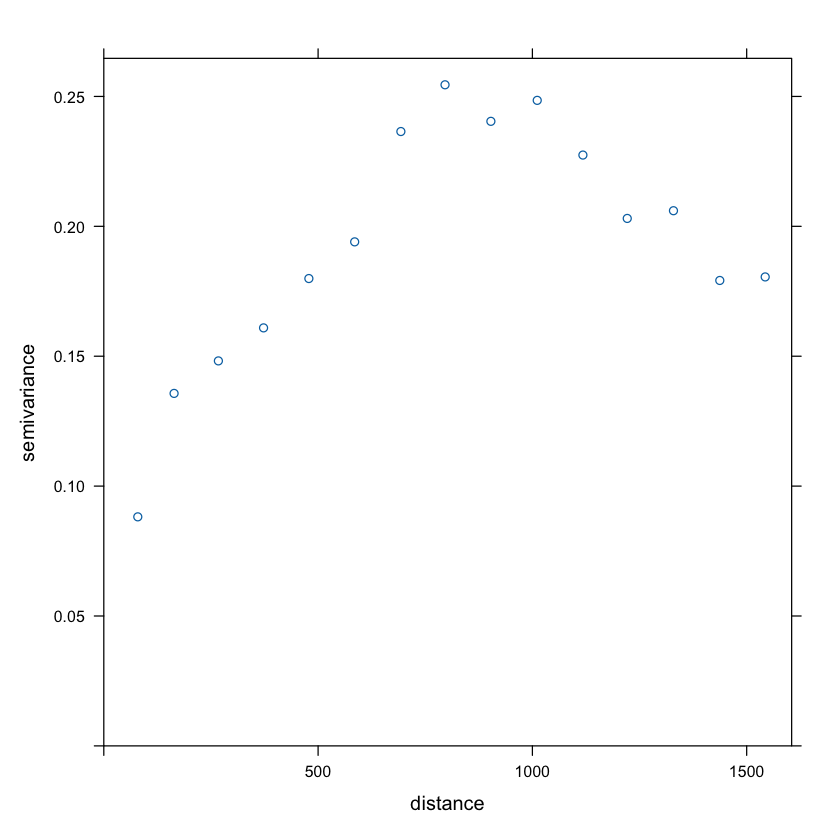

In [63]:
# Estimate the variogram from GLS residuals:
#?variogram.gstat
v.gls <- variogram(meuse.gstat) # difference wrt before (before we were just giving a formula, now we give the non-stationary object)
plot(v.gls) 
# before it was 0.6, now 0.25

,model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Nug,0.07980791,0.000,0.0,0,0,0,1,1
2,Sph,0.14917202,863.959,0.5,0,0,0,1,1


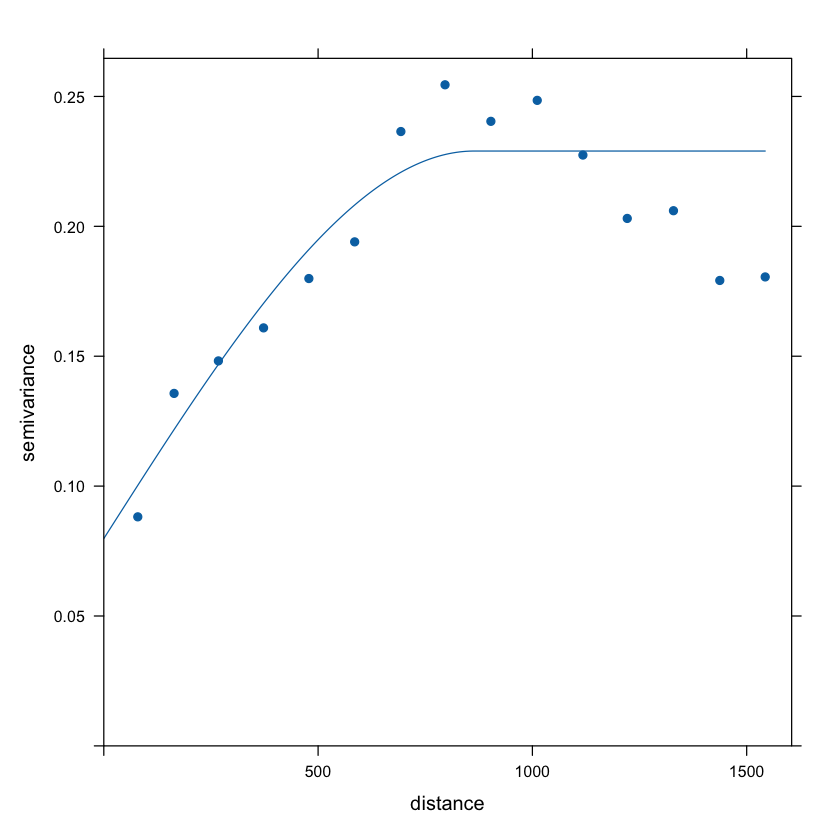

In [64]:
v.gls.fit <- fit.variogram(v.gls, vgm(0.25, "Sph", 800, 0.8)) # vgm(sill, model, range, nugget)
v.gls.fit
plot(v.gls, v.gls.fit, pch = 19)

In [65]:

# Update gstat object with variogram model
meuse.gstat <- gstat(id = 'zinc', formula = log(zinc) ~ sqrt(dist),
                     data = meuse, nmax = 50, model = v.gls.fit, set = list(gls=1))
meuse.gstat

data:
zinc : formula = log(zinc)`~`sqrt(dist) ; data dim = 155 x 12 nmax = 50
variograms:
        model      psill   range
zinc[1]   Nug 0.07980791   0.000
zinc[2]   Sph 0.14917202 863.959
set gls = 1; 

In [66]:
## universal kriging:

s0.new
## I have to define also the covariate in s_0
s0.vec <- as.vector(slot(s0.new,'coords'))
# distance to the river: calculate the distance between s0 and each point of
# the river, then select the minimum
s0.dist <- min(rowSums(scale(meuse.riv,s0.vec)^2)) 
s0.new <- as.data.frame(c(s0.new,s0.dist))
names(s0.new) <- c('x','y','dist')
coordinates(s0.new) <- c('x','y')
s0.new <- as(s0.new, 'SpatialPointsDataFrame')
s0.new

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

SpatialPoints:
          x      y
[1,] 179180 330100
Coordinate Reference System (CRS) arguments: NA 

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = 

       coordinates       dist
1 (179180, 330100) 0.02006051

In [ ]:
# Function "predict" uses the residual variogram stored in the gstat
# object to make the prediction
predict(meuse.gstat, s0.new) # you need to give object and new location
# variance > 0 (as expected) --> large underestimation of uncertainty (--> sigma is actually unknown)

In [ ]:
# this gives the estimate of x(s_0)'*beta
# (trend component) under gls
predict(meuse.gstat, s0.new, BLUE = TRUE)

# prediction over the entire grid
lz.uk <- predict(meuse.gstat, meuse.grid, BLUE=FALSE)

# estimate of the mean over the entire grid
lz.uk.BLUE <- predict(meuse.gstat, meuse.grid, BLUE=TRUE)

spplot(lz.ok[,1], main = 'Ordinary Kriging') # pattern is given by the data

x11()
spplot(lz.uk[,1], main = 'Universal Kriging') # much stronger patterns following the river

x11()
spplot(lz.uk.BLUE[,1], main = 'Universal Kriging - drift')

x11()
spplot(lz.uk[,2], main = 'Universal Kriging - Variance')


# Is the drift important to explain the variability of the response variable z_s?
# z_s = m_s (drift) + delta_s (residuals)
# Let's compare the variogram of the data and of the residuals:
plot(v$dist,v$gamma,xlab='distance',ylab='semivariance',pch=19,col='skyblue1',ylim=c(0,0.8))
curve(v.f.est(x, C0=v.fit[2,2]+v.fit[1,2], cov.pars=rbind(c(v.fit[2,2], v.fit[2,3]),c(v.fit[1,2], v.fit[1,3])), 
              cov.model = c("spherical","pure.nugget")), from = 0.0001, to = 1600,
              xlab = "distance", ylab = expression(gamma(h)),
      main = "Variogram model",add=TRUE,col='skyblue1',lwd=2, ylim=c(0,110)) # variance of z estimated from observations (0.6)

points(v.gls$dist,v.gls$gamma,xlab='distance',ylab='semivariance',pch=19,col='steelblue',ylim=c(0,0.8))
curve(v.f.est(x, C0=v.gls.fit[2,2]+v.gls.fit[1,2], 
              cov.pars=rbind(c(v.gls.fit[2,2], v.gls.fit[2,3]),c(v.gls.fit[1,2], v.gls.fit[1,3])), 
              cov.model = c("spherical","pure.nugget")), from = 0.0001, to = 1600,
      xlab = "distance", ylab = expression(gamma(h)),
      main = "Variogram model",add=TRUE,col='steelblue',lwd=2, ylim=c(0,110)) # variance of the residuals (0.2) [iterative algorithm]

# variance explained by the drift is what is in between the two curves;
# the larger the difference between the sills of stationary and non stationary model, 
# the more the regressors are important in explaining variability
# if there is not much difference among the two, we can go for a stationary model (simpler)
graphics.off()



# xx <- variogram(log(zinc) ~ sqrt(dist), data = meuse)
# fit.xx <- fit.variogram(xx, vgm(1, "Sph", 800, 1))
# yy <- gstat(formula = log(zinc) ~ sqrt(dist), data = meuse, model = fit.xx)
# predict(yy, s0.new, BLUE = TRUE)



# Further references on this example
# - documentation of the package
#   https://www.gstat.org/gstat.pdf
# - a brief tutorial
#   https://cran.r-project.org/web/packages/gstat/vignettes/gstat.pdf
# - further references with extra plots, functions and materials
#   http://statweb.lsu.edu/faculty/li/IIT/spatial.html
#   https://rstudio-pubs-static.s3.amazonaws.com/558732_e09c44c118d94efb951ab71b26abf80b.html
#   http://rstudio-pubs-static.s3.amazonaws.com/10213_8c02d102993942a88574e44abdf3a235.html
